In [29]:
!pip install yfinance

In [30]:
!pip install tweepy textblob wordcloud

In [31]:
!pip install newsapi-python

In [32]:
import pathlib
import seaborn as sns

import pandas as pd
import yfinance as yf
import numpy as np
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud
import re  
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
from newsapi import NewsApiClient
from datetime import datetime, timedelta

# API setup
api_key = "8d843fb27c4e4b1f9727a801c3c76b0b"
newsapi = NewsApiClient(api_key=api_key)

# Set date range: from 30 days ago to today
today = datetime.today()
from_date = (today - timedelta(days=30)).strftime('%Y-%m-%d')
to_date = today.strftime('%Y-%m-%d')

# Get news about HDFC Bank
articles = newsapi.get_everything(q="HDFC Bank",
                                  language='en',
                                  from_param=from_date,
                                  to=to_date,
                                  sort_by='relevancy',
                                  page_size=100)

# Store in DataFrame
data = []
for article in articles['articles']:
    data.append([article['publishedAt'], article['title'], article['description']])

df_news = pd.DataFrame(data, columns=['Date', 'Title', 'Description'])
df_news['Date'] = pd.to_datetime(df_news['Date']).dt.date

df_news


,Date,Title,Description
0,2025-06-20,India's HDB Financial IPO pricing not influenc...,MUMBAI (Reuters) -The initial public offering ...
1,2025-06-12,India’s Largest Companies 2025: Big Banks High...,"Financial institutions like HDFC Bank, ICICI B..."
2,2025-06-19,Eternal and Vedanta among stocks which Edelwei...,Edelweiss Mutual Fund adjusted its portfolio i...
3,2025-07-02,HDB Financial Services shares set for stock ma...,"HDB Financial Services, backed by HDFC Bank, i..."
4,2025-06-30,Which stocks should traders buy as indices hit...,As benchmark indices reached a nine-month high...
...,...,...,...
95,2025-07-06,Most banks see muted loan growth in June quarter,India's banking sector experienced a slowdown ...
96,2025-06-09,"Lilavati Trust seeks removal of HDFC Bank CEO,...",Lilavati Kirtilal Mehta Medical Trust (LKMM Tr...
97,2025-06-09,Chetan Mehta has no relation to Mehta family d...,"Chetan Mehta, a trustee of Lilavati Kirtilal M..."
98,2025-07-06,Sumitomo Mitsui DS Asset Management Company Lt...,Sumitomo Mitsui DS Asset Management Company Lt...


In [34]:
df_news['Text'] = df_news['Title'].fillna('') + ' ' + df_news['Description'].fillna('')


In [35]:
df_news['Sentiment'] = df_news['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
daily_sentiment = df_news.groupby('Date')['Sentiment'].mean().reset_index()
df_news

,Date,Title,Description,Text,Sentiment
0,2025-06-20,India's HDB Financial IPO pricing not influenc...,MUMBAI (Reuters) -The initial public offering ...,India's HDB Financial IPO pricing not influenc...,-0.028571
1,2025-06-12,India’s Largest Companies 2025: Big Banks High...,"Financial institutions like HDFC Bank, ICICI B...",India’s Largest Companies 2025: Big Banks High...,0.083333
2,2025-06-19,Eternal and Vedanta among stocks which Edelwei...,Edelweiss Mutual Fund adjusted its portfolio i...,Eternal and Vedanta among stocks which Edelwei...,0.000000
3,2025-07-02,HDB Financial Services shares set for stock ma...,"HDB Financial Services, backed by HDFC Bank, i...",HDB Financial Services shares set for stock ma...,0.172222
4,2025-06-30,Which stocks should traders buy as indices hit...,As benchmark indices reached a nine-month high...,Which stocks should traders buy as indices hit...,0.080000
...,...,...,...,...,...
95,2025-07-06,Most banks see muted loan growth in June quarter,India's banking sector experienced a slowdown ...,Most banks see muted loan growth in June quart...,0.466667
96,2025-06-09,"Lilavati Trust seeks removal of HDFC Bank CEO,...",Lilavati Kirtilal Mehta Medical Trust (LKMM Tr...,"Lilavati Trust seeks removal of HDFC Bank CEO,...",-0.105556
97,2025-06-09,Chetan Mehta has no relation to Mehta family d...,"Chetan Mehta, a trustee of Lilavati Kirtilal M...",Chetan Mehta has no relation to Mehta family d...,0.176190
98,2025-07-06,Sumitomo Mitsui DS Asset Management Company Lt...,Sumitomo Mitsui DS Asset Management Company Lt...,Sumitomo Mitsui DS Asset Management Company Lt...,0.061429


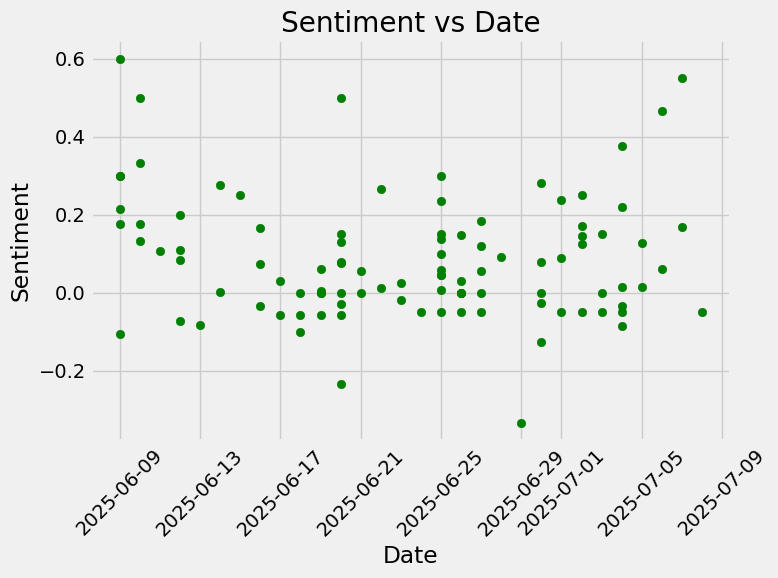

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df_news['Date'],df_news['Sentiment'], color='green')
plt.title('Sentiment vs Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
ticker = "HDFCBANK.NS"
df_stock = yf.download(ticker, start="2025-06-01", end="2025-07-08", progress=False)
df_stock.columns = df_stock.columns.droplevel(1)  # drop the 'Ticker' level

df_stock = df_stock.reset_index()

df_stock = df_stock[['Date', 'Close']]

df_stock['Date'] = pd.to_datetime(df_stock['Date']).dt.date

df_stock.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_16848\163907277.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stock = yf.download(ticker, start="2025-06-01", end="2025-07-08", progress=False)


Price,Date,Close
0,2025-06-02,1911.076050
1,2025-06-03,1903.657715
2,2025-06-04,1920.077026
3,2025-06-05,1928.385620
4,2025-06-06,1957.168945


In [38]:
df_merged = pd.merge(df_stock, daily_sentiment, on='Date', how='left')
df_merged['Sentiment'] = df_merged['Sentiment'].fillna(0)
df_merged


,Date,Close,Sentiment
0,2025-06-02,1911.076050,0.000000
1,2025-06-03,1903.657715,0.000000
2,2025-06-04,1920.077026,0.000000
3,2025-06-05,1928.385620,0.000000
4,2025-06-06,1957.168945,0.000000
5,2025-06-09,1957.366943,0.247487
6,2025-06-10,1943.914917,0.285208
7,2025-06-11,1929.177002,0.107143
8,2025-06-12,1922.253174,0.080357
9,2025-06-13,1896.733887,-0.083333


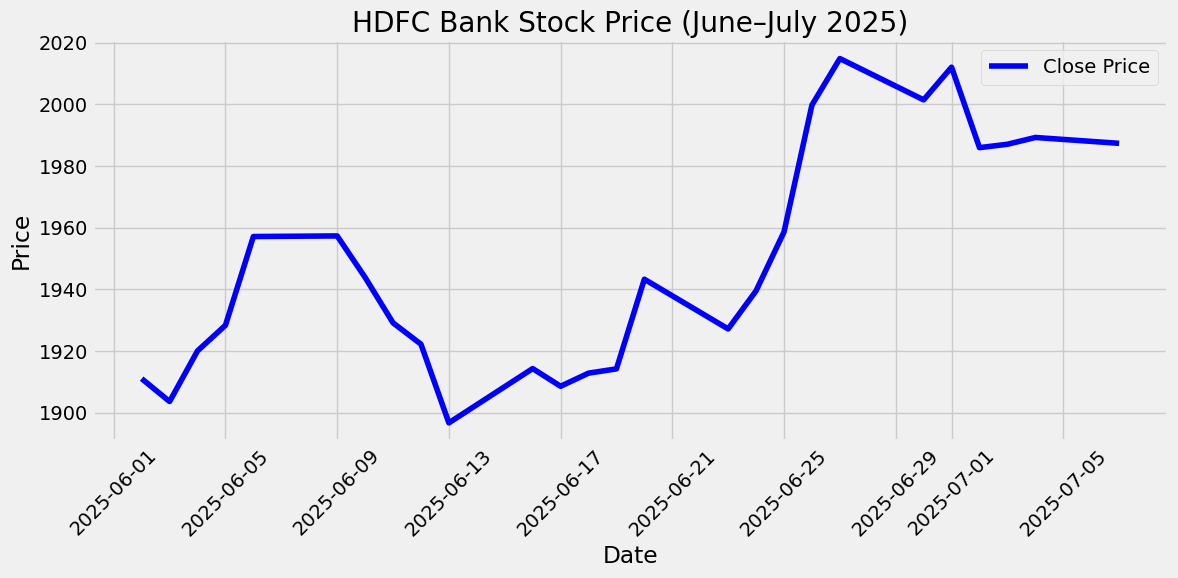

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df_merged['Date'], df_merged['Close'], label='Close Price', color='blue')
plt.title('HDFC Bank Stock Price (June–July 2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


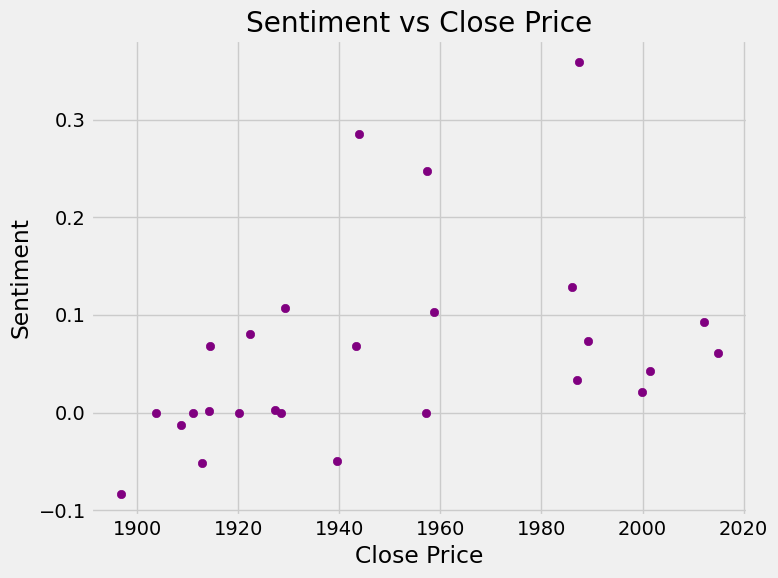

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(df_merged['Close'],df_merged['Sentiment'],  color='purple')
plt.title('Sentiment vs Close Price')
plt.xlabel('Close Price')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


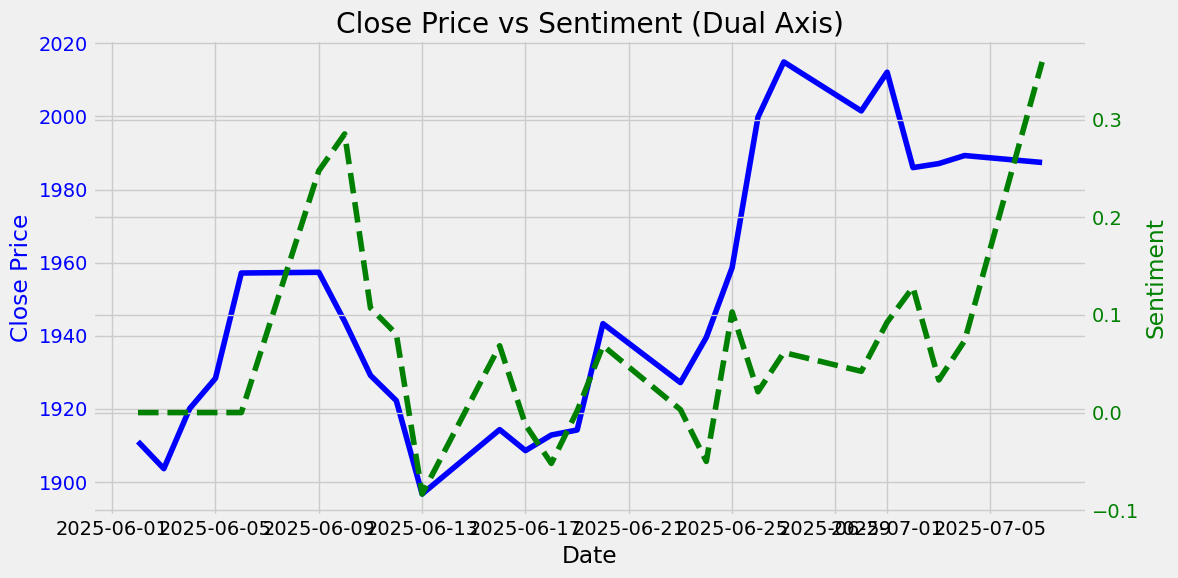

In [41]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df_merged['Date'], df_merged['Close'], color='blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment', color='green')
ax2.plot(df_merged['Date'], df_merged['Sentiment'], color='green', linestyle='--', label='Sentiment')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Close Price vs Sentiment (Dual Axis)')
fig.tight_layout()
plt.grid(True)
plt.show()


# Creating  Labels (Up = 1, Down = 0)

In [42]:
df_merged['Next_Close'] = df_merged['Close'].shift(-1)
df_merged['Movement'] = df_merged['Next_Close'] - df_merged['Close']
df_merged['Label'] = df_merged['Movement'].apply(lambda x: 1 if x > 0 else 0)

# Drop last row (no next day price)
df_final = df_merged.dropna()
df_final

,Date,Close,Sentiment,Next_Close,Movement,Label
0,2025-06-02,1911.076050,0.000000,1903.657715,-7.418335,0
1,2025-06-03,1903.657715,0.000000,1920.077026,16.419312,1
2,2025-06-04,1920.077026,0.000000,1928.385620,8.308594,1
3,2025-06-05,1928.385620,0.000000,1957.168945,28.783325,1
4,2025-06-06,1957.168945,0.000000,1957.366943,0.197998,1
5,2025-06-09,1957.366943,0.247487,1943.914917,-13.452026,0
6,2025-06-10,1943.914917,0.285208,1929.177002,-14.737915,0
7,2025-06-11,1929.177002,0.107143,1922.253174,-6.923828,0
8,2025-06-12,1922.253174,0.080357,1896.733887,-25.519287,0
9,2025-06-13,1896.733887,-0.083333,1914.340210,17.606323,1


In [43]:
X = df_final[['Sentiment']]  # Features
y = df_final['Label']        # Target

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
y_pred=lr.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6
Confusion Matrix:
 [[0 2]
 [0 3]]


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
from sklearn.svm import SVC

# Create and train model
svm_model = SVC(kernel='rbf')  
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)


In [52]:
y_pred

array([0, 1, 1, 1, 1])

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8
Confusion Matrix:
 [[1 1]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



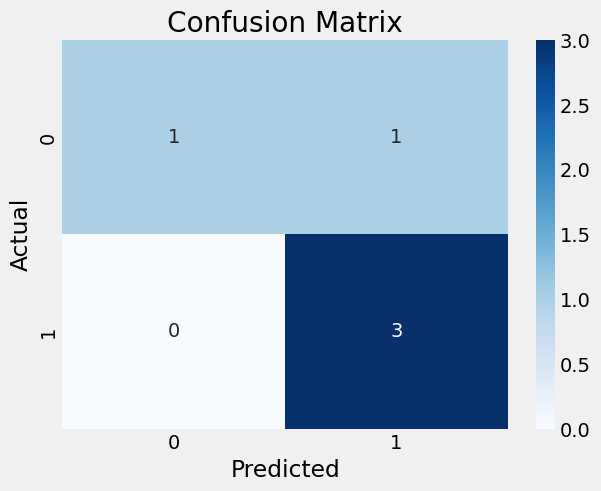

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
df_final.to_csv("merged_sentiment_stock_data.csv", index=False)

# LSTM

In [60]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(label_series[i+window_size])  # Use corresponding label
    return np.array(X), np.array(y)

# Step 2: Prepare data
sentiment_series = df_final['Sentiment'].values
label_series = df_final['Label'].values

window_size = 5
X, y = create_sequences(sentiment_series, window_size)

# Step 3: Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=0)


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Accuracy with window size 5: {accuracy:.2f}")


LSTM Accuracy with window size 5: 0.80
